# PHAS0028 Data Analysis Final Assignment

## This notebook includes Part 1 and Part 2 of the PHAS0028 DA Final Assignment

### Code is commented and  markdown cells will discuss what a cell is doing and interperet the outputs.

## PART A:

1) A

2) B/D

3) C

4) D

5) A/D

## PART B:

In [1]:
# backend for plots
%matplotlib inline
# importing numpy and plotting modules
import numpy as np
import matplotlib.pyplot as plt
# include borders for histograms etc
plt.rcParams["patch.force_edgecolor"] = True

### Task 1: Load data

##### This section contains code which takes a named data set to create a graph containing error bars and returns the arrays of data from the file.

In [2]:
def load_data(filename,hide):
    """
    Returns:
    Three data arrays from data file.
    Plots the data (Assuming in form x,y,dy) on labelled graph containing error bars.
    Includes option to hide graph and only output data arrays.
    
    
    Input:
        - Filename = name of file containing data to be used
        - hide = switch for graph display, takes values True (hide) or False (show)
    
    """
    #Load the data in using the input of the function
    temp, volt, volt_err = np.loadtxt(filename, unpack=True)                      
    #Plot labelled graph of loaded data including error bars
    plt.figure(figsize=(12,8))
    plt.errorbar(temp,volt,yerr=volt_err,capsize=2,fmt='.',label=f"data from {filename[:-4]}")
    plt.grid()
    plt.title(f"Plot of data from {filename}")
    plt.xlabel("Temperature (C)", fontsize =10 )
    plt.ylabel("Voltage (V)", fontsize =10)
    plt.legend(loc=1,fontsize=15)
    #Switch used to display/hide graph from output
    plt.close(hide)
    #Return three data arrays
    return temp,volt,volt_err
    

(array([80., 77., 74., 71., 68., 65., 62., 59., 56., 53., 50., 47., 44.,
        41., 38., 35., 32., 29., 26., 23., 20., 17., 14., 11.,  8.,  5.]),
 array([0.389, 0.421, 0.467, 0.512, 0.571, 0.597, 0.641, 0.702, 0.754,
        0.81 , 0.872, 0.94 , 1.012, 1.091, 1.166, 1.248, 1.322, 1.42 ,
        1.488, 1.566, 1.653, 1.735, 1.807, 1.869, 1.94 , 2.   ]),
 array([0.01, 0.02, 0.01, 0.03, 0.02, 0.03, 0.01, 0.02, 0.02, 0.01, 0.02,
        0.02, 0.04, 0.03, 0.04, 0.02, 0.03, 0.04, 0.02, 0.03, 0.03, 0.03,
        0.03, 0.02, 0.02, 0.04]))

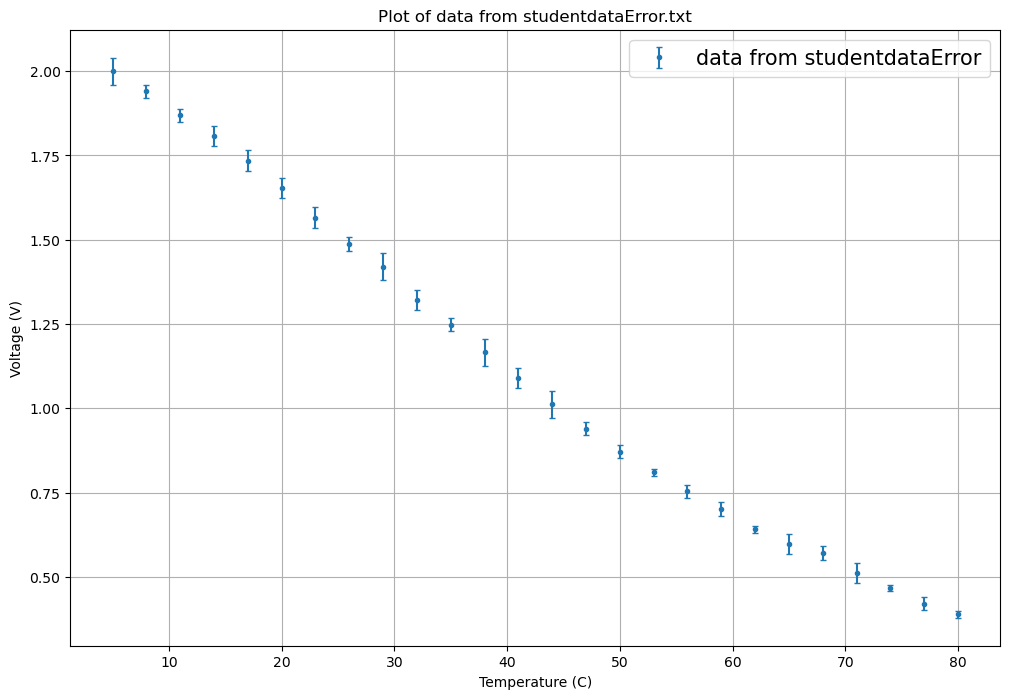

In [3]:
#Testing the function for the given file "studentdataError.txt"

load_data("studentdataError.txt",False)


#### As seen above, the function works as intended. It simply takes the filename and display setting and returns the data arrays and graph (if switched on).

### Task 2: Linear fitting

##### This section will produce two linear fits of degrees one and two (quadratic).

###### -------------------------------------------------------------------------------------
#### Simple one degree Linear fit:

A simple linear fit will be plotted for two cases. First, where the error is assumed to be 0.06V for all y-values, and then using the original error values from the file. Both fits will be plotted on the seperate graph along with the original data points. The goodness of fit will be tested by calculating Chi-squared ($\chi^2$) values which will commented on after.



$$
 \chi^2 =
\sum_{i=1}^n
(\frac{d_i}{\Delta y_i})^2
$$
$$
\\ \
\\ \text{Where}: d_i = y_i - mx_i -c
$$

Gradient for fit is -0.023 +- 0.00048
Y-intercept for fit is 2.07 +- 0.023
Chi-squared is 20.42


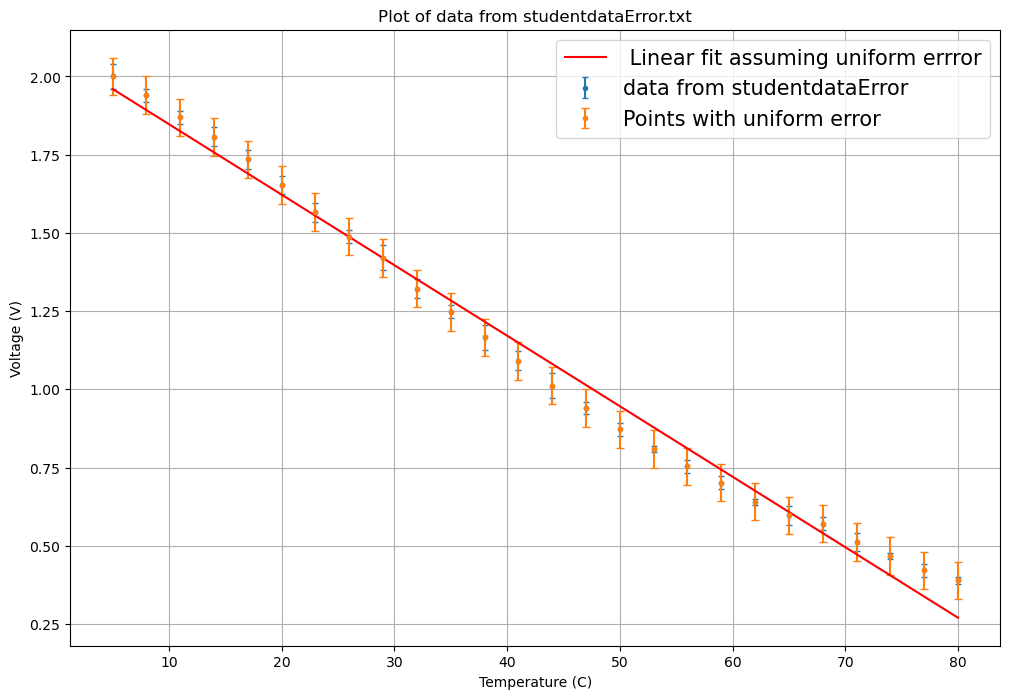

In [4]:
#### linear fit assuming uniform error
### Since the errors are uniform, an unweighted fit is suitable.

#Initliase the fit degree:
degree = 1

#Use load_data to create the arrays for the fit:
temp,volt,volt_err = load_data("studentdataError.txt",False)

#Plot points with uniform error bars
plt.errorbar(temp,volt,yerr=0.06,capsize=3,fmt='.',label=f"Points with uniform error")

#Use numpy.polyfit to calculate parameters for fit:
l_coeffs_uniform, l_errors_uniform = np.polyfit(temp,volt,degree, cov=True)

#Errors on parameters
l_dm_uniform, l_dc_uniform = np.sqrt(np.diag(l_errors_uniform))

#Print the parameters with errors
print(f"Gradient for fit is {l_coeffs_uniform[0]:.3f} +- {l_dm_uniform:.5f}" )
print(f"Y-intercept for fit is {l_coeffs_uniform[1]:.2f} +- {l_dc_uniform:.3f}" )

#Create x array for plotting smooth fitted line:
xline= np.linspace(min(temp),max(temp),50)

#Plot fit using calculated parameters:
l_yline_uniform = l_coeffs_uniform[0] * xline + l_coeffs_uniform[1]
plt.plot(xline,l_yline_uniform, label=" Linear fit assuming uniform errror", linewidth=1.5, color='r');

#Create legend to identify the fit:
plt.legend(loc=1, fontsize=15);

#Calculating residuals for this fit:
l_residuals_uniform = volt - l_coeffs_uniform[0]*temp - l_coeffs_uniform[1]
                 
#Calculate chisquared
chisquared = sum((l_residuals_uniform/0.06)**2)  

#Print cell and f-string to display chisquared value
print(f"Chi-squared is {chisquared:.2f}")


Gradient for fit is -0.022 +- 0.00017
Y-intercept for fit is 2.03 +- 0.010
Chi-squared is 288.84 to 2 sf


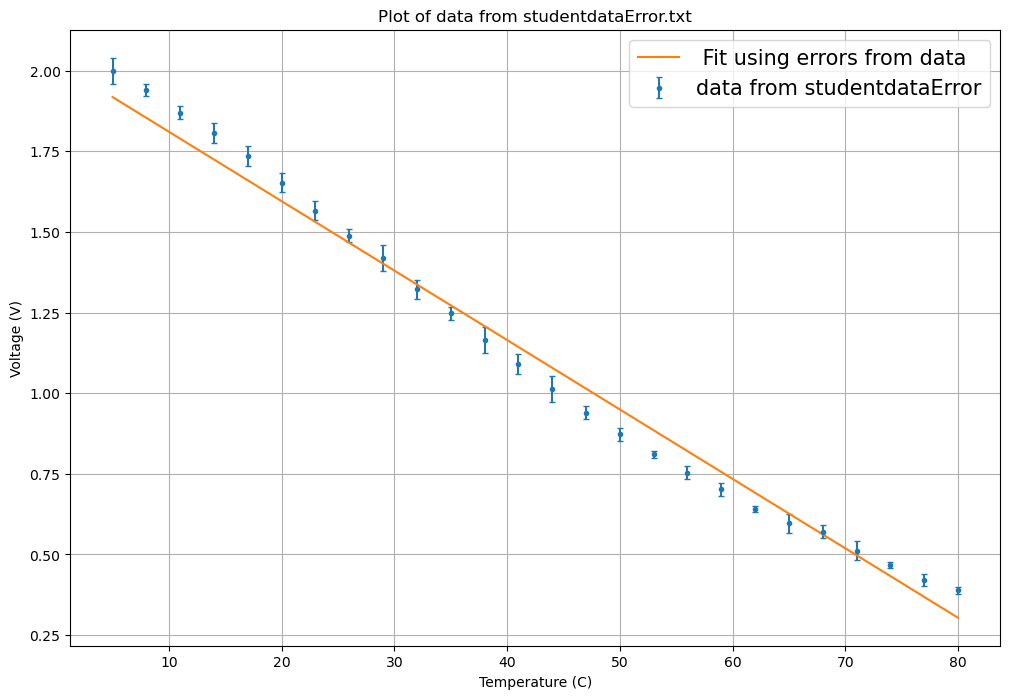

In [5]:
### linear fit using errors from data
### since the errors are not uniform, a weighted fit is neccesary

#Initliase the fit degree
degree = 1

#Use load_data to create the arrays for the fit:
temp,volt,volt_err = load_data("studentdataError.txt",False)


#Use numpy.polyfit to calculate parameters for case of orignal errors from data:
l_coeffs_original, errors = np.polyfit(temp, volt,degree, w=1/volt_err, cov='unscaled')

#Errors on parameters
l_dm_original , l_dc_original = np.sqrt(np.diag(errors))

print(f"Gradient for fit is {l_coeffs_original[0]:.3f} +- {l_dm_original:.5f}" )
print(f"Y-intercept for fit is {l_coeffs_original[1]:.2f} +- {l_dc_original:.3f}" )


#Plot fit using calculated parameters:
yline = l_coeffs_original[0] * xline + l_coeffs_original[1]
plt.plot(xline,yline , label=" Fit using errors from data", linewidth=1.5)

#Create legend to identify the fit:
plt.legend(loc=1, fontsize=15);

#Calculating residuals for this fit:
l_residuals_original = volt - l_coeffs_original[0]*temp - l_coeffs_original[1]

#Calculating Chi-squared for the this fit:
chisquared = np.sum((l_residuals_original/volt_err)**2)

print(f"Chi-squared is {chisquared:.2f} to 2 sf")




Chi-squared is 3.69 to 2 sf


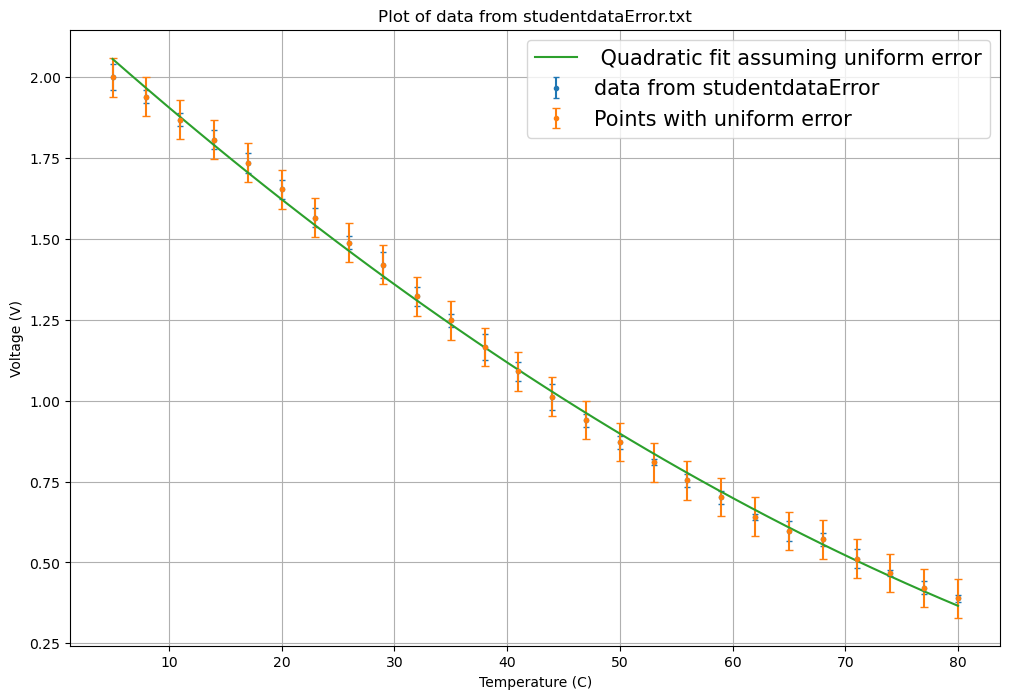

In [6]:
#Initliase the fit degree
degree = 2

#Use load_data to create the arrays for the fit:
temp,volt,volt_err = load_data("studentdataError.txt",False)


#Plot points with uniform error bars
plt.errorbar(temp,volt,yerr=0.06,capsize=3,fmt='.',label=f"Points with uniform error")

#Use numpy.polyfit to calculate parameters for case of orignal errors from data:
q_coeffs_uniform, q_errors_uniform = np.polyfit(temp,volt, degree, cov=True)

err = np.sqrt(np.diag(q_errors_uniform))


q_yline_uniform = q_coeffs_uniform[0]*xline**2 + q_coeffs_uniform[1]*xline + q_coeffs_uniform[2]

plt.plot(xline,q_yline_uniform, label=" Quadratic fit assuming uniform error", linewidth=1.5)


#Create legend to identify the fit:
plt.legend(loc=1, fontsize=15);

q_residuals_uniform = volt - q_coeffs_uniform[0]*temp**2 - q_coeffs_uniform[1]*temp - q_coeffs_uniform[2]

q_chisquared_uniform = np.sum((q_residuals_uniform/0.06)**2)

print(f"Chi-squared is {q_chisquared_uniform:.2f} to 2 sf")




Chi-squared is 33.60 to 2 sf


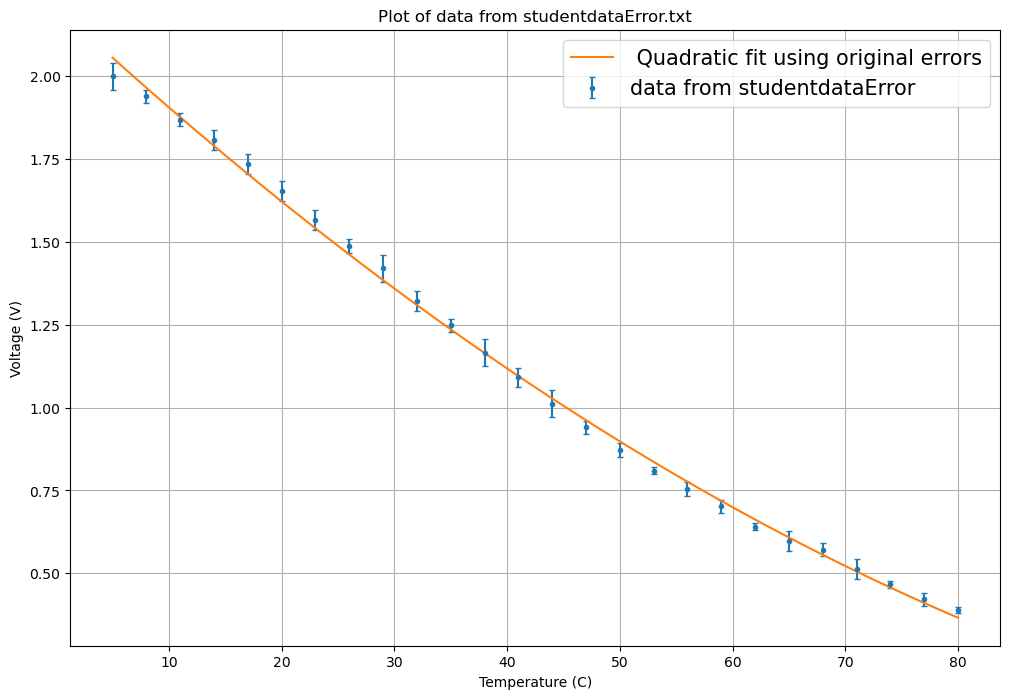

In [7]:
temp,volt,volt_err = load_data("studentdataError.txt",False)

degree = 2

q_coeffs_original, q_errors_original = np.polyfit(temp,volt, degree, cov='Unscaled')

err = np.sqrt(np.diag(q_errors_original))


q_yline_original = q_coeffs_original[0]*xline**2 + q_coeffs_original[1]*xline + q_coeffs_original[2]

plt.plot(xline,q_yline_original,label=" Quadratic fit using original errors", linewidth=1.5)


#Create legend to identify the fit
plt.legend(loc=1, fontsize=15);

q_residuals_original = volt - q_coeffs_original[0]*temp**2 - q_coeffs_original[1]*temp - q_coeffs_original[2]

q_chisquared_original = np.sum((q_residuals_original/volt_err)**2)

print(f"Chi-squared is {q_chisquared_original:.2f} to 2 sf")

#### Comments:

The best fit is clearly a quadtraic fit, with the assumption that the error is uniform (0.06V) for all results. This is show by the chi-squared value of 3.69, which is significantly lower than any fit. 
    
The other quadratic fit, where the actual error values from the file were used, produced a chi-squared of 33.60. This is nearly 10 times larger, which suggest that the errors have been underestimated.

The linear fit is clearly not suitable as the chi squared values were both large suggesting large underestimation in the errors.

### Task 3: Residuals

In [8]:
#Import cure_fit from scipy for Gaussian fit
from scipy.optimize import curve_fit
#Import norm from scipy for histogram
from scipy.stats import norm     


#Define function which plots residuals for inputted fit.
def residuals(filename, a,b,c,dy):
    """
     Plots scatter of residuals from specified fit
       
    Input:
    filename = name of data file being used
    a,b,c = parameters of specified polynomial fit where y = ax^2 + bx + c
    dy = array of errors for each y data point
    """
    
    #Load data:
    temp, volt, volt_err = np.loadtxt(filename, unpack=True)    
    #Calculate residuals and plot them on labelled graph to show distribution around 0: 
    residuals = (volt - a*temp**2 - b*temp - c)
    plt.figure(figsize=(12, 8))
    plt.axhline(y=0,linestyle="--",color='r')
    plt.grid()
    plt.scatter(temp, residuals)
    plt.title("Plot of Residuals")
    plt.ylabel("Residuals (V)")
    plt.xlabel("Temperatiure (C)")

    
    
def Gauss(x,A, B, x0, std):
    '''Gaussian function with offset A, amplitude B, mean x0 and standard deviation std.'''
    return A + B*np.exp(-(x-x0)**2/(2*std**2))       #Use function for Gaussian function requiring initial guess parameters.

def residual_gaussian(filename, a,b,c,dy):
    """
    Plots scatter of residuals from specified fit and then uses Gauss function to fit curve given appropriate initial guesses.
       
    Input:
    filename = name of data file being used
    a,b,c = parameters of specified polynomial fit where y = ax^2 + bx + c
    dy = array of errors for each y data point
    """
    #Load data:
    temp, volt, volt_err = np.loadtxt(filename, unpack=True)    
    #Calculate residuals and plot them on labelled graph to show distribution around 0: 
    residuals = (volt - a*temp**2 - b*temp - c)
    plt.figure(figsize=(12, 8))
    plt.grid()
    plt.axhline(y=0,linestyle="--",color='r')
    plt.scatter(temp, residuals)
    plt.title("Plot of residuals")
    plt.ylabel("Residuals (V)")
    plt.xlabel("Temperatiure (C)")
       
    #Create array of x values for smooth fit:
    xline = np.linspace(min(temp),max(temp),50)
    #Determine Gaussian fit using Gauss function and scipy curve fit:
    popt, pcov = curve_fit(Gauss, temp,residuals, param_guesses)
    #Create y array and plot with x values:
    yline = Gauss(xline,*popt)
    plt.plot(xline,yline)




def histogram(filename, a,b,c,dy):  
    """
    Calculates normalised residuals and produces Histogram from these values
    
    Input:
    filename = name of data file being used
    a,b,c = parameters of specified polynomial fit where y = ax^2 + bx + c
    dy = array of errors for each y data point
    """
    #Load data:
    temp, volt, volt_err = np.loadtxt(filename, unpack=True)    
    
    #Calculate residuals:
    residuals = (volt - a*temp**2 - b*temp - c)
    
    #Normalise residuals:
    residauls_norm = residuals/dy
    
    #Create figure and plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(residuals/dy, bins=15, edgecolor='black', color='skyblue', alpha=0.7, density=True, label='Histogram')

    # Fitting Gaussian distribution
    mu, std = norm.fit(residuals/dy)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label=f'Fit result: $\mu={mu:.2f}$, $\sigma={std:.2f}$')
        
    #Label histogram
    plt.title('Histogram of Normalised Residuals with Gaussian Fit')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.legend()   
    plt.grid()
    
    
def chi_squared(filename, a,b,c,dy):
    """
    Calculates and prints chi-squared for given fit
   
   Input:
    filename = name of data file being used
    a,b,c = parameters of specified polynomial fit where y = ax^2 + bx + c
    dy = array of errors for each y data point
    """
    #Load data:
    temp, volt, volt_err = np.loadtxt(filename, unpack=True)    
    
    #Calculate residuals:
    residuals = (volt - a*temp**2 - b*temp - c)
    #Calculate chi-squared to test goodness of fit:
    
    chisquared = sum((residuals/dy)**2)
   
    #Print cell and f-string to display chisquared value:      
    print(f"Chi-squared for this fit is {chisquared:.2f}")
    







#### Testing code:

I will now test the code for the case of the linear fit with assumed uniform errors of 0.06V and the quadratic fit using the originial errors from the data file. I will comment on the results of the test in each case.

Chi-squared for this fit is 20.42


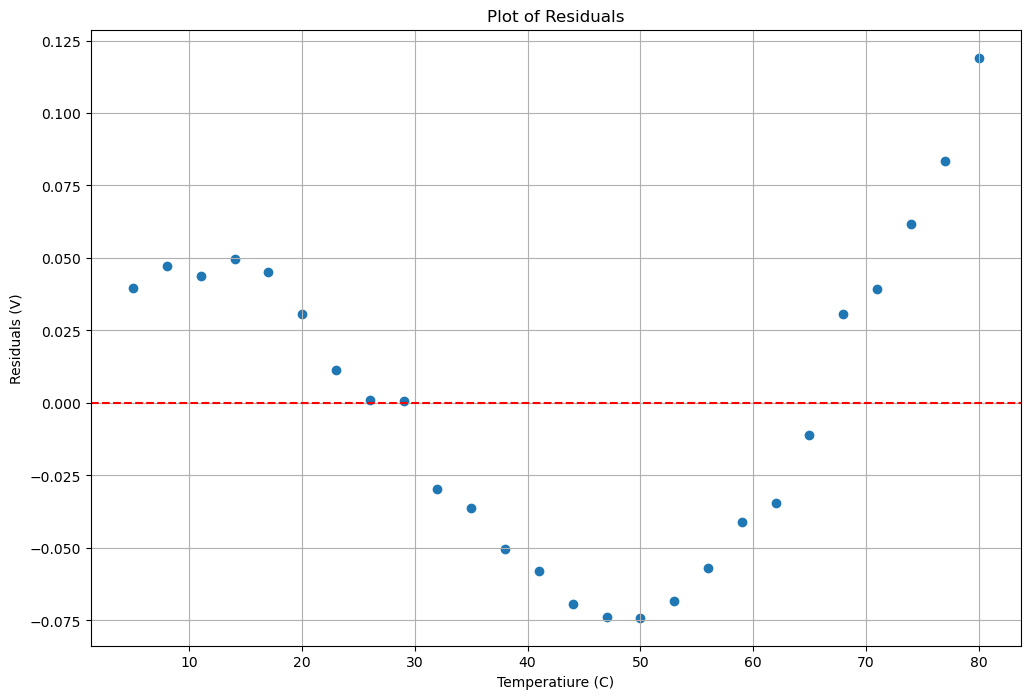

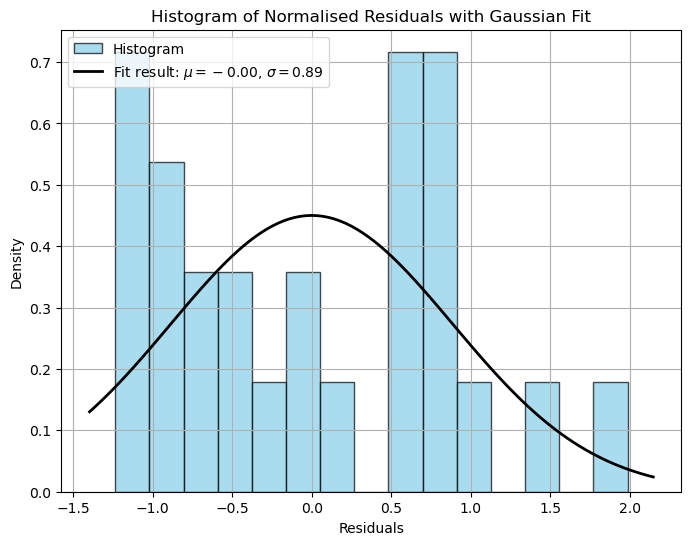

In [9]:
### Simple linear fit with assumed uniform error of 0.06V


#Create array of uniform errors with equivalent length to x data:
v = 0.06    
dy = np.full(26,v)

residuals("studentdataError.txt",0,l_coeffs_uniform[0],l_coeffs_uniform[1],dy)

chi_squared("studentdataError.txt",0,l_coeffs_uniform[0],l_coeffs_uniform[1],dy)

histogram("studentdataError.txt",0,l_coeffs_uniform[0],l_coeffs_uniform[1],dy)


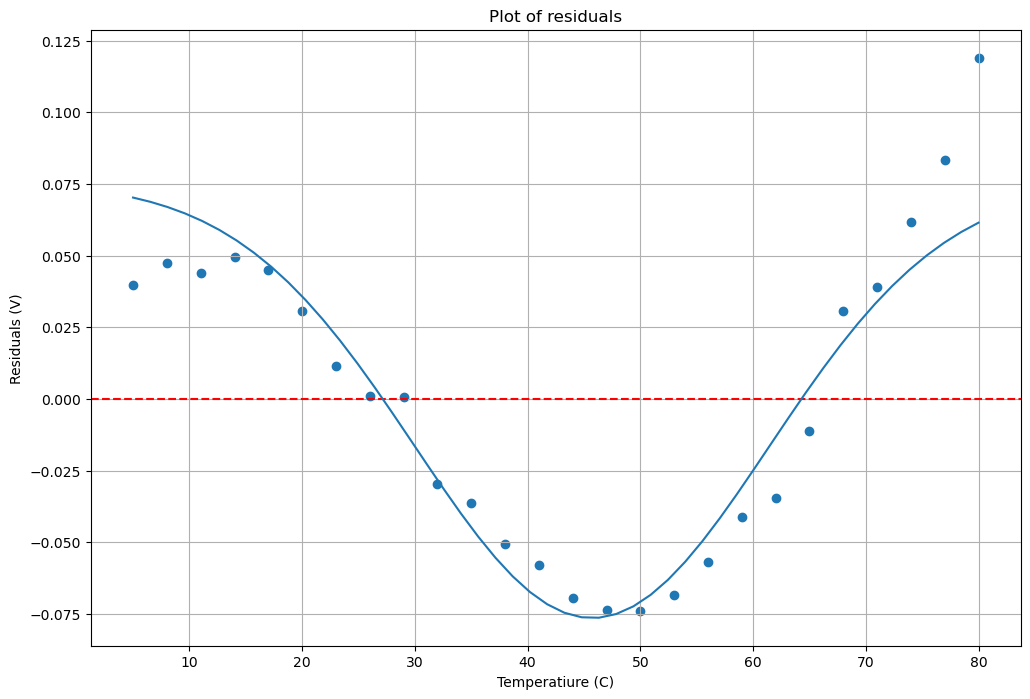

In [10]:
#Looking at the plot of the residuals, I have used these initial guess parameters to create a Gaussian curve:
param_guesses=[0.08,-0.075,50,30]

residual_gaussian("studentdataError.txt",0,l_coeffs_uniform[0],l_coeffs_uniform[1],dy)

###### Comments:

Residual normality indicates a balanced distribution around zero. This assumption implies that the model accurately encapsulates the primary trends and sources of fluctuation in the data, with errors displaying a sense of randomness and independence.

A mean of 0, and a standard deviation of 0.89 in the normalized residual histogram suggests that, on average, the residuals deviate from the mean by approximately 0.89 units. This value provides a measure of the typical spread or dispersion of the residuals around the mean. In practical terms, it indicates the level of variability in the model's predictions, with a smaller standard deviation suggesting more consistent and precise predictions. It aligns with the assumption that the residuals follow a normal distribution, and values around 0.89 are within the expected range for a standard normal distribution. Overall, a standard deviation of 0.89 contributes to the assessment of the model's reliability and the distribution of prediction errors.



Chi-squared for this fit is 33.60


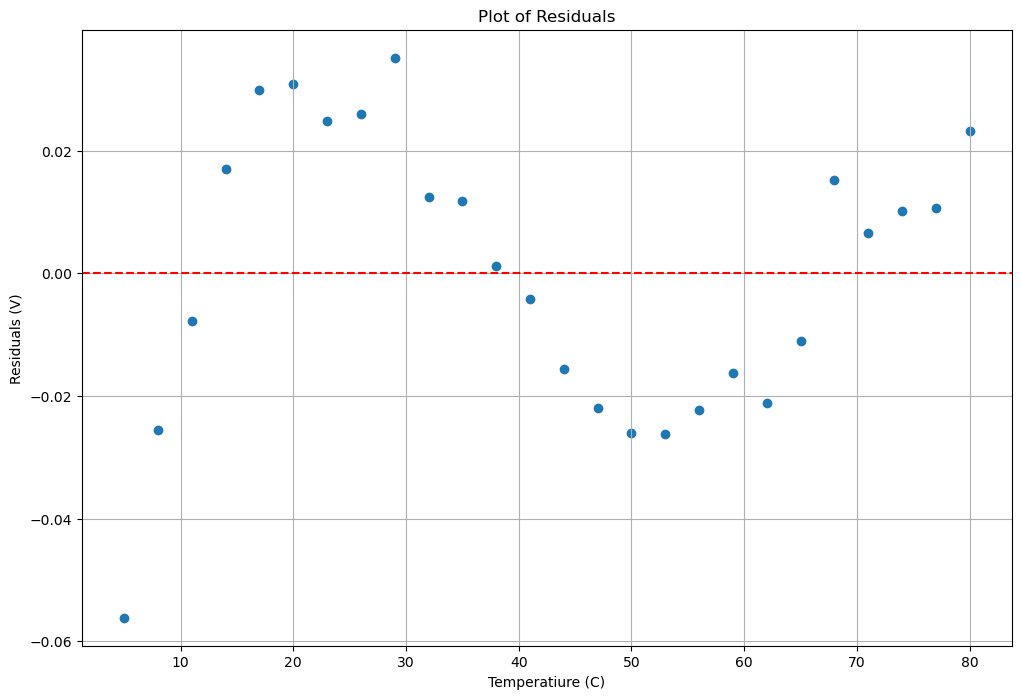

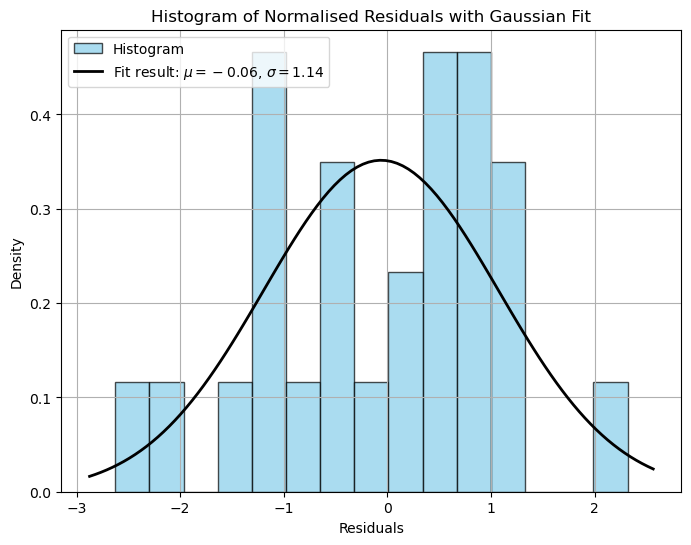

In [11]:
### Quadratic fit with errors from data set



residuals("studentdataError.txt",q_coeffs_original[0],q_coeffs_original[1],q_coeffs_original[2],volt_err)

chi_squared("studentdataError.txt",q_coeffs_original[0],q_coeffs_original[1],q_coeffs_original[2],volt_err)

histogram("studentdataError.txt",q_coeffs_original[0],q_coeffs_original[1],q_coeffs_original[2],volt_err)

##### Comments:

As seen from the residuals plot, a gaussian cannot accurately describe the residuals plot. A quadratic pattern in residuals around 0 may indicate that the model is not adequately capturing the underlying relationship in the data. This could mean that there is a non-linear component missing from the model, and the model might need to be adjusted to better fit the data.

In summary, if residuals show a quadratic pattern around 0, it signals the presence of systematic errors or a lack of fit in the model, prompting a reassessment and potential refinement of the modeling approach.

A mean of 48.23 in the normalized residual histogram suggests the presence of systematic bias, and further investigation into the model's adequacy and potential improvements is warranted.

Having a mean near 0 in the residuals of a statistical model is important because it indicates that, on average, the model's predictions are unbiased. A mean close to 0 suggests that the model is accurately estimating the target variable without a consistent tendency to overestimate or underestimate. This aligns with the assumption that residuals follow a normal distribution with a mean of 0. A deviation from this expectation may signal systematic errors in the model, impacting its reliability and interpretability. Therefore, a mean near 0 simplifies interpretation and supports the model's validity.

### Task 4: Polynomial fit

### $\chi^2$ and  $\chi ^2_{reduced}$ calculation for each plot

$$
\chi^2 =
\sum_{i=1}^n
(\frac{d_i}{\Delta y_i})^2
$$

$$
\chi^2_{reduced}
= \frac{\chi^2}{K}
$$

#### 4th Order Polynomial

Chi-squared is 0.23 to 2 sf
Redcued Chi-squared is 0.010 to 2 sf


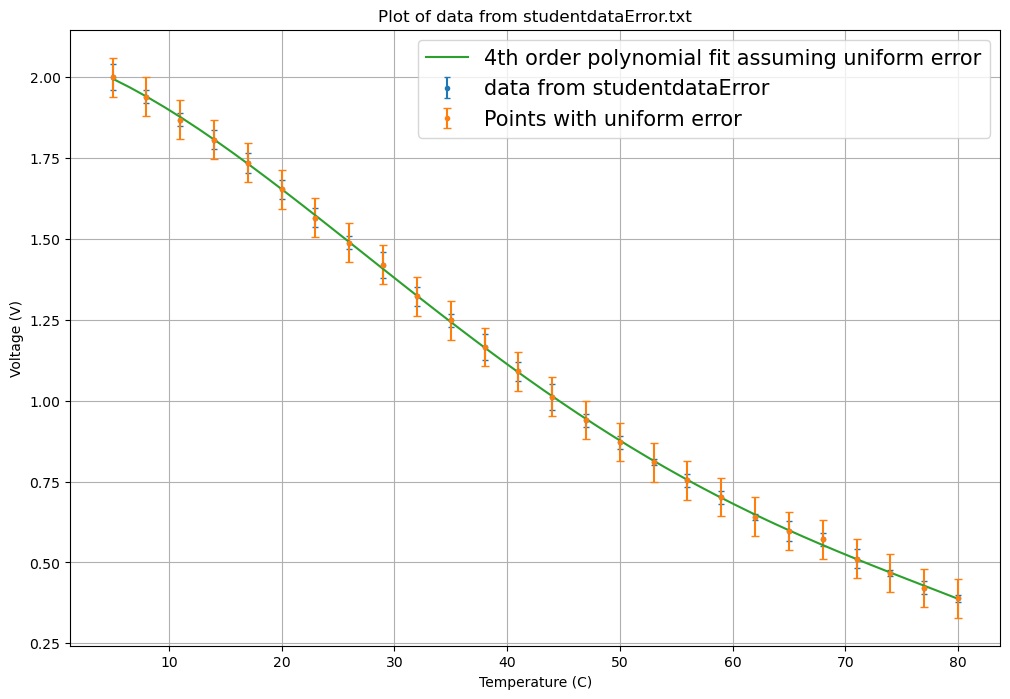

In [12]:
#Use load_data function to get data from file
temp,volt,volt_err = load_data("studentdataError.txt",False)

#Initialise polynomial order
degree = 4


#Create array of uniform error bars (0.06V)
v = 0.06    
dy = np.full(26,v)


#Plot points with uniform error bars
plt.errorbar(temp,volt,yerr=0.06,capsize=3,fmt='.',label=f"Points with uniform error")

#Calculate coefficients for fit using numpy.polyfit
q_coeffs_uniform, q_errors_uniform = np.polyfit(temp,volt, degree, cov=True)
err = np.sqrt(np.diag(q_errors_uniform))

#Create xline array for smooth fit
xline=np.linspace(min(temp),max(temp),50)

#Create y-line using polynomial formula and plot
q_yline_uniform = q_coeffs_uniform[0]*xline**4 + q_coeffs_uniform[1]*xline**3 + q_coeffs_uniform[2]*xline**2 + q_coeffs_uniform[3]*xline + q_coeffs_uniform[4]
plt.plot(xline,q_yline_uniform,label="4th order polynomial fit assuming uniform error", linewidth=1.5)


#Create legend to identify the fit
plt.legend(loc=1, fontsize=15);

#Calculate residuals
q_residuals_uniform = volt - q_coeffs_uniform[0]*temp**4 - q_coeffs_uniform[1]*temp**3 - q_coeffs_uniform[2]*temp**2 - q_coeffs_uniform[3]*temp - q_coeffs_uniform[4]

#Calculate and print chi-squared
q_chisquared_uniform = np.sum((q_residuals_uniform/dy)**2)
print(f"Chi-squared is {q_chisquared_uniform:.2f} to 2 sf")

#Calculate degrees of freedom
K = 26 - 4

#Calculate and print reduced chi-squared
q_reduced_chisquared_uniform = q_chisquared_uniform / K
print(f"Redcued Chi-squared is {q_reduced_chisquared_uniform:.3f} to 2 sf")

#### Comments: 

For the 4th order polynomial, assuming all errors to be uniform and = 0.06, Reduced Chi-squared is <<1 which implies that this model is overfitted. Chi-squared is minimised which is important for the goodness of fit, however overfitting is bad because it produces a biased model of the data, not accurately encompassing the errors and deviations in the data.

Chi-squared is 2.10 to 2 sf
Redcued Chi-squared is 0.096 to 2 sf


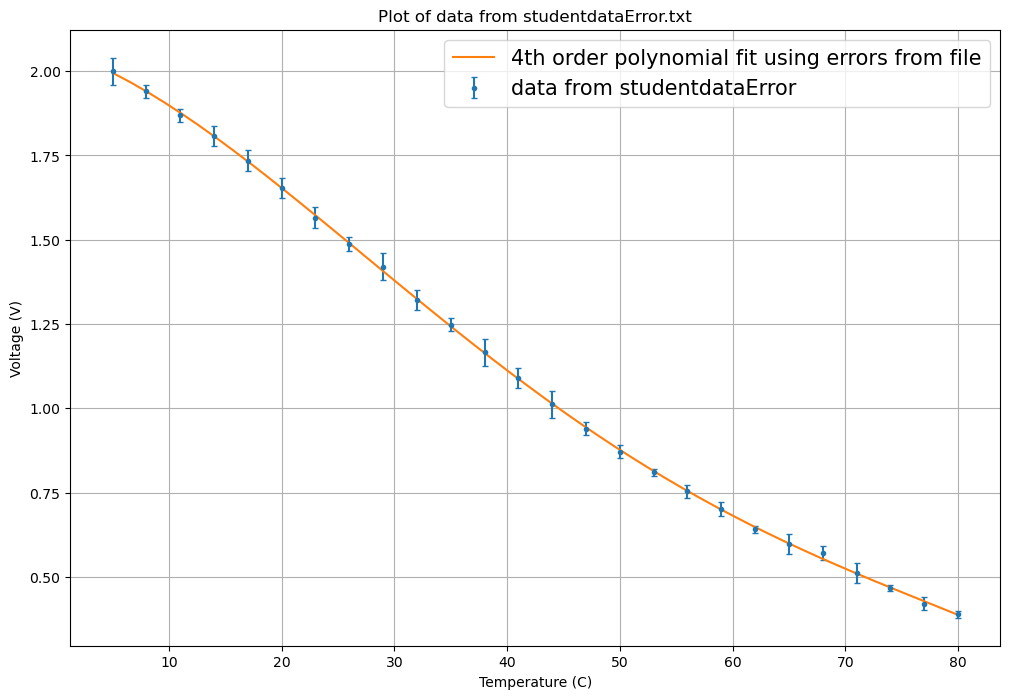

In [13]:
#Use load_data function to get data from file
temp,volt,volt_err = load_data("studentdataError.txt",False)


#Initialise polynomial order
degree = 4

#Calculate coefficients for fit using numpy.polyfit
q_coeffs_original, q_errors_original = np.polyfit(temp,volt, degree, cov=True)
err = np.sqrt(np.diag(q_errors_original))

#Create xline array for smooth fit
xline=np.linspace(min(temp),max(temp),50)

#Create y-line using polynomial formula and plot
q_yline_original = q_coeffs_original[0]*xline**4 + q_coeffs_original[1]*xline**3 + q_coeffs_original[2]*xline**2 + q_coeffs_original[3]*xline + q_coeffs_original[4]
plt.plot(xline,q_yline_original,label="4th order polynomial fit using errors from file", linewidth=1.5)

#Create legend to identify the fit
plt.legend(loc=1, fontsize=15);

#Calculate residuals
q_residuals_original = volt -  q_coeffs_original[0]*temp**4 - q_coeffs_original[1]*temp**3 - q_coeffs_original[2]*temp**2 - q_coeffs_original[3]*temp - q_coeffs_original[4]

#Calculate and print chi-squared
q_chisquared_original = np.sum((q_residuals_original/volt_err)**2)
print(f"Chi-squared is {q_chisquared_original:.2f} to 2 sf")

#Calculate degrees of freedom
K = 26 - 4

#Calculate and print reduced chi-squared
q_reduced_chisquared_original = q_chisquared_original / K
print(f"Redcued Chi-squared is {q_reduced_chisquared_original:.3f} to 2 sf")

###### Comments:

A reducing Chi-squared implies that this fit is more suitable for the data than a quadratic/linear fit. There is decreasing deviation between the actual data and the plot which also suggest the accuracy is increasing. Chi-squared reduced is <<1 implying that the fit is overfitted.

#### 5th order polynomial 

Chi-squared is 0.20 to 2 sf
Redcued Chi-squared is 0.0093 to 2 sf


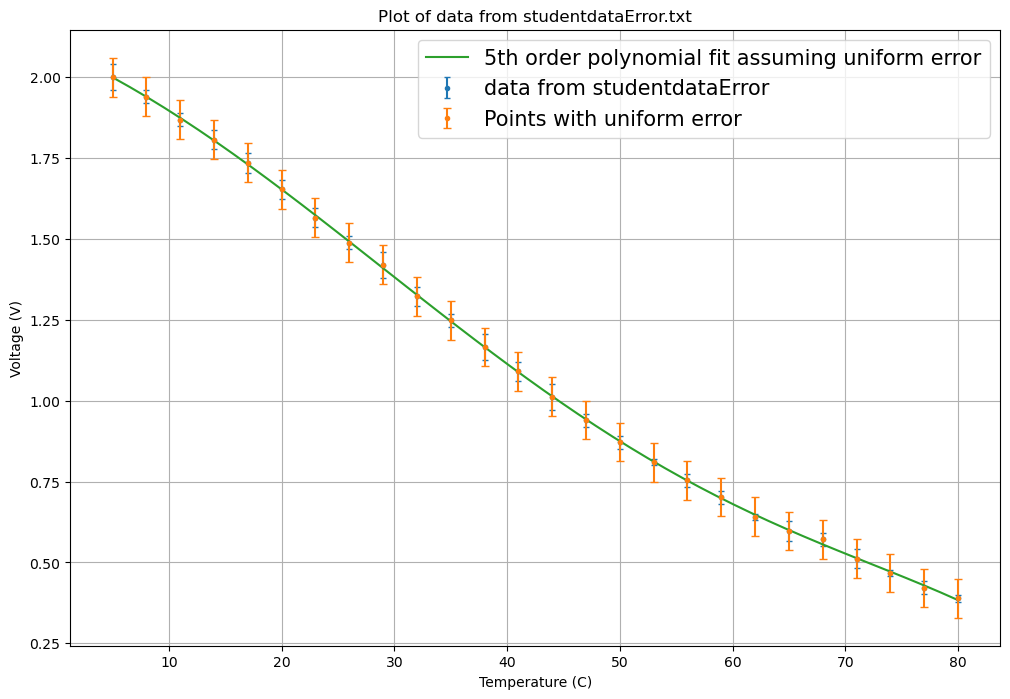

In [14]:
#Use load_data function to get data from file
temp,volt,volt_err = load_data("studentdataError.txt",False)

#Initialise polynomial order
degree = 5

#Create array of uniform error bars (0.06V)
v = 0.06    
dy = np.full(26,v)

#Plot points with uniform error bars
plt.errorbar(temp,volt,yerr=0.06,capsize=3,fmt='.',label=f"Points with uniform error")

#Calculate coefficients for fit using numpy.polyfit
q_coeffs_uniform, q_errors_uniform = np.polyfit(temp,volt, degree, cov=True)
err = np.sqrt(np.diag(q_errors_uniform))

#Create xline array for smooth fit
xline=np.linspace(min(temp),max(temp),50)

#Create y-line using polynomial formula and plot
q_yline_uniform = q_coeffs_uniform[0]*xline**5 + q_coeffs_uniform[1]*xline**4 + q_coeffs_uniform[2]*xline**3 + q_coeffs_uniform[3]*xline**2 + q_coeffs_uniform[4]*xline + q_coeffs_uniform[5]
plt.plot(xline,q_yline_uniform,label="5th order polynomial fit assuming uniform error", linewidth=1.5)


#Create legend to identify the fit
plt.legend(loc=1, fontsize=15);

#Calculate residuals
q_residuals_uniform = volt - (q_coeffs_uniform[0]*temp**5 + q_coeffs_uniform[1]*temp**4 + q_coeffs_uniform[2]*temp**3 + q_coeffs_uniform[3]*temp**2 + q_coeffs_uniform[4]*temp + q_coeffs_uniform[5])

#Calculate and print chi-squared
q_chisquared_uniform = np.sum((q_residuals_uniform/dy)**2)
print(f"Chi-squared is {q_chisquared_uniform:.2f} to 2 sf")

#Calculate degrees of freedom
K = 26 - 5

#Calculate and print reduced chi-squared
q_reduced_chisquared_uniform = q_chisquared_uniform / K
print(f"Redcued Chi-squared is {q_reduced_chisquared_uniform:.4f} to 2 sf")

##### Comments:

Chi-squared is now significantly minimised which implies the goodness of fit is much greater. A reduced chi-squared means there is less discrespency between what we have observed and what can be inferred from the fit. However the value has stopped decreasing by a great amount, potentially suggesting that the model is now overfitting the data. Chi-squared reduced is much less than one which implies the model is being greatly overfitted. This can also be observed in the plot as the line nearly fits through the data by connecting the dots.

Chi-squared is 2.06 to 2 sf
Redcued Chi-squared is 0.098 to 2 sf


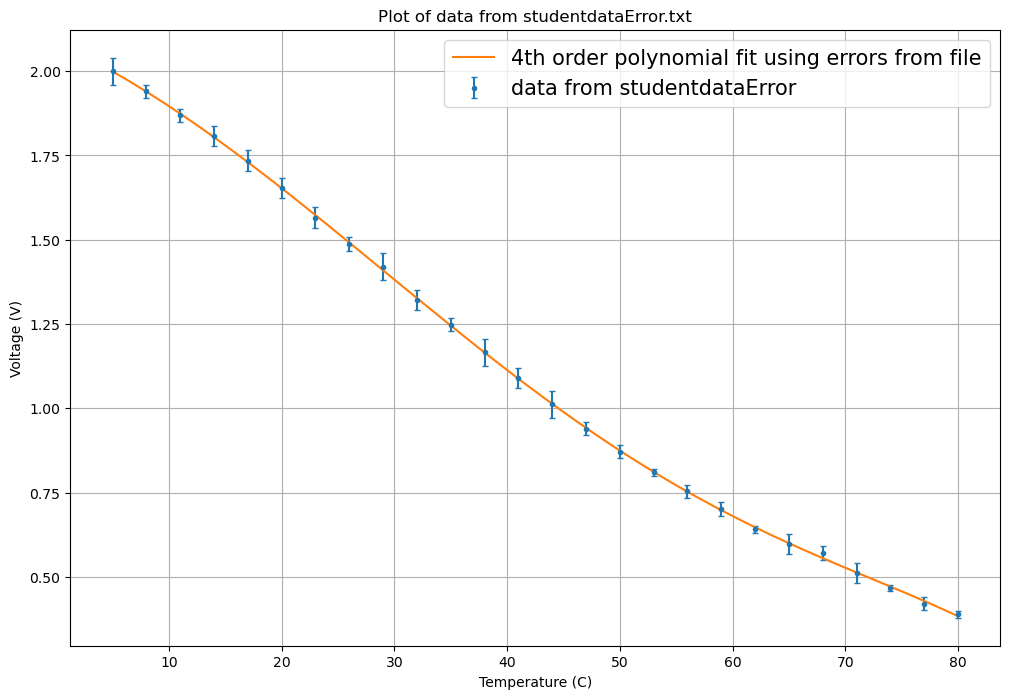

In [15]:
#Use load_data function to get data from file
temp,volt,volt_err = load_data("studentdataError.txt",False)

#Initialise polynomial order
degree = 5


#Calculate coefficients for fit using numpy.polyfit
q_coeffs_original, q_errors_original = np.polyfit(temp,volt, degree, cov=True)

err = np.sqrt(np.diag(q_errors_original))


#Create xline array for smooth fit
xline=np.linspace(min(temp),max(temp),50)

#Create y-line using polynomial formula and plot
q_yline_original = q_coeffs_original[0]*xline**5 + q_coeffs_original[1]*xline**4 + q_coeffs_original[2]*xline**3 + q_coeffs_original[3]*xline**2 + q_coeffs_original[4]*xline + q_coeffs_original[5]
plt.plot(xline,q_yline_original,label="4th order polynomial fit using errors from file", linewidth=1.5)


#Create legend to identify the fit
plt.legend(loc=1, fontsize=15);


#Calculate residuals
q_residuals_original = volt -  (q_coeffs_original[0]*temp**5 + q_coeffs_original[1]*temp**4 + q_coeffs_original[2]*temp**3 + q_coeffs_original[3]*temp**2 + q_coeffs_original[4]*temp + q_coeffs_original[5])

#Calculate and print chi-squared
q_chisquared_original = np.sum((q_residuals_original/volt_err)**2)
print(f"Chi-squared is {q_chisquared_original:.2f} to 2 sf")

#Calculate degrees of freedom
K = 26 - 5

#Calculate and print reduced chi-squared
q_reduced_chisquared_original = q_chisquared_original / K
print(f"Redcued Chi-squared is {q_reduced_chisquared_original:.3f} to 2 sf")

##### Comments: 

Chi-squared is decreasing which implies that the the quality of the fit is improving. However Reduced Chi-sqaured is now much smaller than one which means that the model is very overfitted.